In [122]:
import pandas as pd
import nltk
import gensim
from nltk.collocations import *
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
import re
import pprint
from nltk.stem.porter import *

In [90]:
pp = pprint.PrettyPrinter()

In [91]:
lmtzr = WordNetLemmatizer()
stemmer = PorterStemmer()

In [92]:
path = 'CommentsForRecc.csv'
mallet_path ='C:\\Users\milaioue\Downloads\mallet-2.0.8\mallet-2.0.8\\bin\mallet'

In [93]:
stoplist = set(stopwords.words('english'))

extraStopwords = ['hotel', 'capita', 'would', 'hotels', 'holiday' ,'inn', 'approved', 'staying' , 'request','rate',
                 'need','due','Thursday','stay','stayed','room','night','policy','per','bed','also','non','hilton'
                 ,'cheaper','cheapest','cheap','proximity','available','book']

stoplist.update(extraStopwords)

In [94]:
frame = pd.read_csv(path,error_bad_lines=False,encoding='ISO-8859-1')

In [95]:
frame = frame.dropna()

In [96]:
frame = frame.reset_index(drop=True)
frame.PNumber = frame.PNumber.astype(str)
frame.PNumber =  frame.PNumber.apply(lambda x : x.split('.')[0])

In [98]:
tokens = [nltk.tokenize.word_tokenize(re.sub("[^a-zA-Z]", " ",s).lower()) for s in frame.OverPolicyComments.tolist()]

In [99]:
tokens = [[stemmer.stem(word) for word in document if word not in stoplist] for document in tokens]

In [100]:
from collections import defaultdict
frequency = defaultdict(int)
for token in tokens:
    for text in token:
        frequency[text] += 1
        
texts = [[text for text in token if frequency[text] > 1] for token in tokens]

In [101]:
# build the dictionary and the corpus for the model
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [102]:
#dictionary = dictionary.filter_extremes(5,0.5)
model_gensim = gensim.models.LdaModel(corpus,id2word=dictionary,num_topics=20)


In [2]:
model_gensim.sace('gensimModelTopics')

NameError: name 'model_gensim' is not defined

In [69]:
import tempfile
tempfile = 'C:\\Users\milaioue\Downloads'
model_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus, num_topics=5, id2word=dictionary)



In [70]:
topics_mallet = model_mallet.print_topics(num_words= 5)

In [75]:
topicsList =[]
for i in topics_mallet:
    temp = re.split('\*|\+',i[1])
    topic_i = [temp[i][1:-2] for i in range(30) if i % 2 != 0]
    topicsList.append(topic_i)

In [ ]:
Visualisation

In [3]:
import pyLDAvis.gensim
import pyLDAvis

vis_data = pyLDAvis.gensim.prepare(model_gensim, corpus, dictionary)
pyLDAvis.show(vis_data)
pyLDAvis.enable_notebook()

C:\Users\milaioue\AppData\Local\Continuum\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
C:\Users\milaioue\AppData\Local\Continuum\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
C:\Users\milaioue\AppData\Local\Continuum\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
C:\Users\milaioue\AppData\Local\Continuum\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
C:\Users\milaioue\AppData\Local\Continuum\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() i

NameError: name 'model_gensim' is not defined

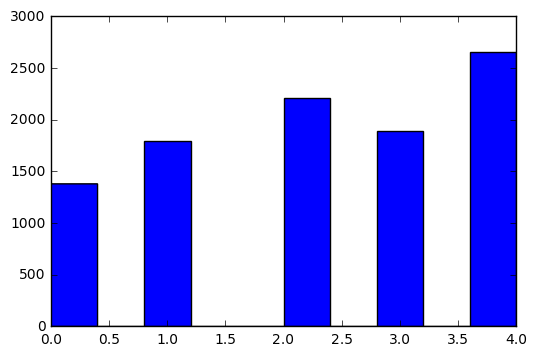

In [40]:
classify = model_mallet[corpus]
cluster = []
for i in classify:
    cluster.append(sorted(i,key = lambda x:x[1])[-1][0],)


import matplotlib.pyplot as plt

plt.hist(cluster)
plt.show()

In [81]:
from collections import Counter
Counter(cluster)

Counter({0: 1380, 1: 1797, 2: 2215, 3: 1893, 4: 2653})

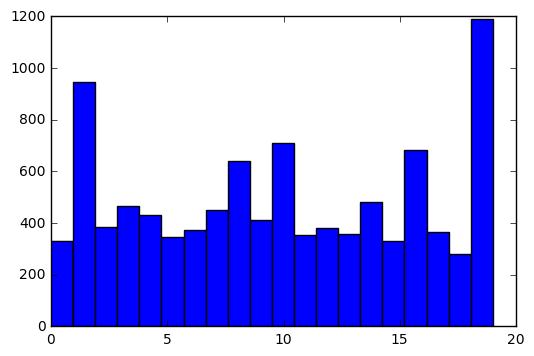

In [105]:
classify = model_gensim[corpus]
cluster_gensim = []
for i in classify:
    cluster_gensim.append(sorted(i,key = lambda x:x[1])[-1][0],)


import matplotlib.pyplot as plt

plt.hist(cluster_gensim,20)
plt.show()

In [104]:
from collections import Counter
Counter(cluster_gensim)

Counter({0: 242,
         1: 327,
         2: 692,
         3: 324,
         4: 559,
         5: 403,
         6: 321,
         7: 331,
         8: 254,
         9: 322,
         10: 297,
         11: 291,
         12: 885,
         13: 425,
         14: 256,
         15: 303,
         16: 351,
         17: 200,
         18: 238,
         19: 700})

In [79]:
indices = []
for cl in range(20):
    temp = []
    temp = [i for i,x in enumerate(cluster_gensim) if x == cl ]
    indices.append(temp)
    

In [108]:
frame['Cluster'] = cluster_gensim

In [114]:
clustered_frame = frame.loc[frame['Cluster'].isin(selected_indices)]
clustered_frame = clustered_frame.reset_index(drop=True)

In [106]:
selected_indices = [0,1,2,3,4,5,9,10,11,12,13,14,15,16,17,19]
subsets = [indices[x] for x in selected_indices]

In [ ]:
frame.ix[[item for sublist in subsets for item in sublist],:]

In [117]:
def nameCluster(value):
    if value in [2,3,10,11,12,15,16,17,19]:
        return 'Location'
    elif value == 1:
        return 'Parking'
    elif value == 4:
        return 'Breakfast'
    elif value == 13:
        return 'Gym'
    elif value == 14:
        return 'Wifi'
    else: 
        return 'Meals'

In [118]:
clustered_frame['Group'] = clustered_frame.Cluster.apply(lambda x : nameCluster(x))

In [121]:
clustered_frame.to_csv('SecondStepForRecc_WithoutComm.csv')